In [54]:
n_reservoir = 3
n_inputs = 2


S = np.ones((n_reservoir,1))
S[0,0] = 1

W = np.zeros((n_reservoir,n_reservoir))
W[0,1] = 1


I = np.zeros((n_inputs,1))
I[0,0] = 1#

WInputs = np.zeros((n_reservoir,n_inputs))

In [55]:
pre = np.dot(W,S) + np.dot(WInputs, I)
pre

array([[1.],
       [0.],
       [0.]])

In [56]:
output = np.tanh(pre)

In [57]:
output

array([[0.76159416],
       [0.        ],
       [0.        ]])

In [58]:
import networkx as nx

class SimpleESN():
    def __init__(self,n_inputs=1,n_reservoir=1):
        self.n_inputs = n_inputs
        self.n_reservoir = n_reservoir
        
        self.S = np.zeros((n_reservoir,1))
        self.states = [self.S[:,0]]
        
        self.W = np.zeros((n_reservoir,n_reservoir))

        self.I = np.zeros((n_inputs,1))

        self.WInputs = np.zeros((n_reservoir,n_inputs))
        
    def _update(self):
        preactivation = np.dot(self.W,self.S) + np.dot(self.WInputs, self.I)
        activation = np.tanh(preactivation)
        assert activation.shape == self.S.shape
        self.S = activation
        self.states.append(self.S[:,0])
        return self.S
        

        
class GraphESN():
    def __init__(self, esn, inputs = []):
        self.G = nx.DiGraph()
            
        # Add nodes
        for n in np.arange(esn.S.shape[0]):
            self.G.add_node(n)
            self.G.node[n]['state'] = 0
    
        # Add Connections:
        for n in np.arange(esn.W.shape[0]):
            for m in np.arange(esn.W.shape[1]):
                if esn.W[n,m] != 0:
                    self.G.add_edge(n,m,weight = esn.W[m,n])
                    #print "%s x %s = %s" %(n,m,esn.W[n,m])
                #else:
                    #print "%s x %s = %s" %(n,m,esn.W[n,m])

        # process inputs
        self.n_inputs =  esn.n_inputs
        self.inputs = []

        # for every input, create a dictionary
        for i in np.arange(self.n_inputs):
            value = esn.I[i]
            an_input = {}

            for n in self.G.nodes():
                an_input[n] = {'value' :value,
                               'weight': esn.WInputs[n,i]}

            # for every node:
                #if there is a weight assocated with the current input,
                
                # add both the weight and the input value to the dictionary
            
            self.inputs.append(an_input)

                    
        self.states = [[self.G.node[n]['state'] for n in self.G.nodes()]]
                    
    def _update(self):
        # For every node:
        step_state = {}
        
        for n in self.G.nodes():
            # For every incoming edge
            new_state = 0
            
            # Synaptic Input
            for pre,post in g.G.in_edges(n):
                
                # activation = activation + w*s
                new_state += self.G.edge[pre][post]['weight'] * self.G.node[pre]['state']
                
                
            # Injeted Input
            for i in self.inputs:
                if n in i.keys():
                
                    new_state += i[n]['value'] * i[n]['weight']
                
                
            step_state[n] = np.tanh(new_state)
        for k in step_state.keys():
            self.G.node[k]['state'] = step_state[k]
        
        self.states.append( [self.G.node[n]['state'][0] for n in self.G.nodes()])
        
        return self.states[-1]
              
 

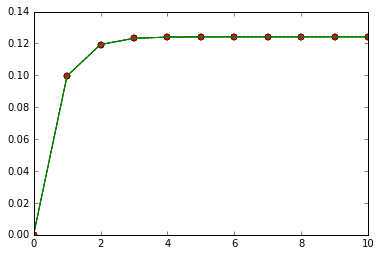

In [59]:
n_inputs = 1        
n_reservoir = 3
n_steps = 10

rand = False

x = SimpleESN(n_inputs,n_reservoir)


if rand:
    x.W = 2*np.random.rand(x.W.shape[0],x.W.shape[1])-1
    x.I = 2*np.random.rand(x.I.shape[0],x.I.shape[1])-1
    x.WInputs = 2*np.random.rand(x.WInputs.shape[0],x.WInputs.shape[1])-1
 
else:
    x.W = -(np.eye(n_reservoir,n_reservoir)-1) * 0.1
    
    x.I = np.zeros(x.I.shape)
    x.I[0,0] = 0.1
    #x.I[1,0] = 0.3

    
    x.WInputs = np.ones(x.WInputs.shape) #* 0.1
    #x.WInputs[1,0] = 1.0#0.3


# Create Graph based ESN
g = GraphESN(x)

for i in np.arange(n_steps):
    g._update()
    x._update()

   
plt.plot(np.array(x.states),'r:o')
plt.plot(np.array(g.states),'g-')
plt.show()


In [60]:
x.W

array([[-0. ,  0.1,  0.1],
       [ 0.1, -0. ,  0.1],
       [ 0.1,  0.1, -0. ]])

In [61]:
x.I

array([[0.1]])

In [47]:
np.max(x.states)

0.12419435184358082